In [37]:
## 캐글에서 train 데이터 다운받기

### 데이터준비

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
train_df = pd.read_csv('train.csv', nrows=100000) # 데이터량이 너무 많으니까 100000만개만 출력함

In [40]:
train_df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.336716e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [41]:
# 콤마를 기준으로 각각에 대응된 것..
unused_columns, label_column = ['id', 'hour', 'device_id', 'device_ip'], 'click'

In [42]:
train_df = train_df.drop(unused_columns, axis = 1)

In [43]:
X_dict_train = list(train_df.drop(label_column, axis = 1).T.to_dict().values())

a = train_df.drop(label_column, axis = 1)

b = a.T                       # T 는 가로,세로를 바꿔주는 

c = b.to_dict()               # 딕셔너리 처리

d = c.values() 

e = list(d)

In [44]:
y_train = train_df[label_column]

In [45]:
test_df = pd.read_csv('train.csv', header = 0, skiprows=(1, 100000), nrows=100000)

In [46]:
test_df = test_df.drop(unused_columns, axis = 1)

In [47]:
X_dict_test = list(test_df.drop(label_column, axis = 1).T.to_dict().values())

In [48]:
y_test = test_df[label_column]

### 원 핫 인코딩 벡터 변환

In [49]:
from sklearn.feature_extraction import DictVectorizer

In [50]:
vectorizer = DictVectorizer(sparse=True)

In [51]:
X_train = vectorizer.fit_transform(X_dict_train)

In [52]:
X_train.shape

(100000, 4952)

In [55]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [56]:
X_test = vectorizer.fit_transform(X_dict_test)

### 그리드 서치를 이용한 의사결정 트리 모델 학습

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
parameters = {'max_depth':[3,10,None]}

In [59]:
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3,scoring='roc_auc')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [65]:
grid_search.best_params_

{'max_depth': 10}

In [66]:
decision_tree_best = grid_search.best_estimator_

### 성능 측정

In [67]:
y_pred = decision_tree_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
np.unique(y_pred, return_counts = True)

(array([0, 1], dtype=int64), array([96544,  3456], dtype=int64))

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_pred)

0.83248

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, y_pred)

array([[81151,  1359],
       [15393,  2097]], dtype=int64)

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

In [78]:
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.20767654, 0.13114754, 0.24324324, ..., 0.11586207, 0.06559647,
       0.06559647])

In [79]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [80]:
auc = roc_auc_score(y_test, y_pred_proba)

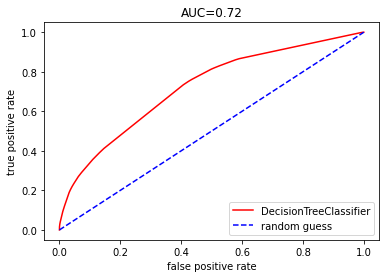

In [86]:
plt.plot(fpr, tpr, 'r-', label='DecisionTreeClassifier')
plt.plot([0,1], [0,1], 'b--', label = 'random guess')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC={0:.2f}'.format(auc))
plt.legend(loc = 'lower right')